In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import numpy as np
import xgboost as xgb

In [2]:
# Carregar os dados

file_path = r"G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\Dist_Consumo_Tratado.xlsx"
data = pd.read_excel(file_path)

In [3]:
data

,dia,placa,hodômetro - Inicio,hodômetro - Fim,SOC - inicio,SOC - Fim,dist,% bat,E_c,dist / % bat
0,01-02-2024,RHO2C28,23447.2,23499.8,1.000,0.388,52.6,61.2,1.221673,0.859477
1,01-03-2023,RHO2C28,17207.9,17258.4,0.988,0.464,50.5,52.4,1.089505,0.963740
2,01-03-2024,RHO2C28,24507.8,24574.8,0.996,0.420,67.0,57.6,0.902687,1.163194
3,01-07-2024,RHO2C28,27380.1,27447.4,0.992,0.308,67.3,68.4,1.067162,0.983918
4,01-11-2023,RHO2C28,20376.0,20439.2,1.000,0.484,63.2,51.6,0.857278,1.224806
...,...,...,...,...,...,...,...,...,...,...
5080,30-11-2023,RHV5C02,21087.0,21130.9,0.988,0.516,43.9,47.2,1.128929,0.930085
5081,30-12-2023,RHV5C02,22175.2,22243.3,0.996,0.380,68.1,61.6,0.949780,1.105519
5082,31-03-2023,RHV5C02,12865.1,12929.8,0.996,0.492,64.7,50.4,0.817929,1.283730
5083,31-05-2023,RHV5C02,15440.9,15487.7,0.984,0.532,46.8,45.2,1.014103,1.035398


In [4]:
#COLUMNS = list(data.columns)
#COLUMNS.remove('Real_Energy_Expenditure(%)')
#COLUMNS.remove('ID_Rota')

X = data['dist']

y = data['% bat']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Inicializar o modelo
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Treinar o modelo
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [8]:
# Fazer previsões
y_pred = xgb_model.predict(X_test)
y_pred

array([46.193027, 37.55786 , 55.90663 , ..., 55.423862, 48.00045 ,
       50.811646], dtype=float32)

In [9]:
# Calcular o erro quadrático médio
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nDesempenho do Modelo:")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Desempenho do Modelo:
MAPE: 9.76%
MSE: 39.9579
R²: 0.6390


In [10]:
# Definir o modelo
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir o espaço de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7, 9, 11],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.85, 0.9, 0.95, 1.0]
}

# Configurar a busca em grade
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, verbose=1, n_jobs=-1)

# Ajustar a busca em grade
grid_search.fit(X_train, y_train)

# Melhor configuração de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor desempenho:", -grid_search.best_score_)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
Melhores parâmetros: {'colsample_bytree': 0.85, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 9, 'n_estimators': 100, 'subsample': 0.9}
Melhor desempenho: 0.09810979784445924


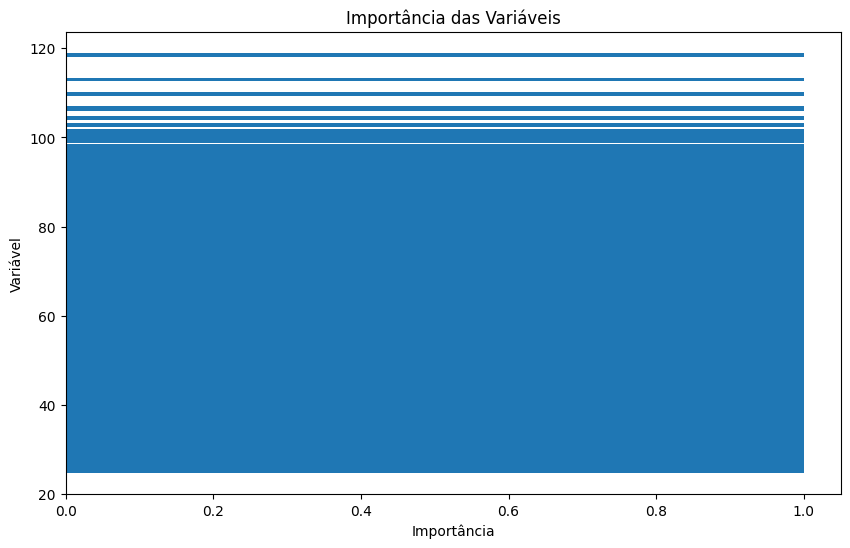

In [12]:
# Obter o modelo com melhor desempenho
best_model = grid_search.best_estimator_

# Plotar a importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_model.feature_importances_)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Importância das Variáveis')
plt.show()


In [13]:
best_model.feature_importances_

array([1.], dtype=float32)

In [14]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
#best_model.save_model('xgboost_bestmodel.json')

# Fazer previsões com o conjunto de teste
y_pred = best_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nDesempenho do Modelo:")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Desempenho do Modelo:
MAPE: 9.68%
MSE: 38.9912
R²: 0.6478


In [15]:
y_pred

array([45.91134 , 38.232048, 57.173603, ..., 56.670406, 47.98113 ,
       50.55096 ], dtype=float32)

In [6]:
modelo_carregado = xgb.XGBRegressor()

# Carregue o modelo do arquivo
modelo_carregado.load_model('xgboost_bestmodel.json')

# Faça previsões com novos dados
teste_y_pred = modelo_carregado.predict(X_test)

In [7]:
mape = mean_absolute_percentage_error(y_test, teste_y_pred)
mse = mean_squared_error(y_test, teste_y_pred)
r2 = r2_score(y_test, teste_y_pred)

print(f"\nDesempenho do Modelo:")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Desempenho do Modelo:
MAPE: 6.17%
MSE: 15.4388
R²: 0.8094


In [10]:
residuos = [y_t - y_p for y_t, y_p in zip(y_test, teste_y_pred)]

residuos = np.array(residuos, dtype=np.float64)

residuos = pd.Series(residuos)

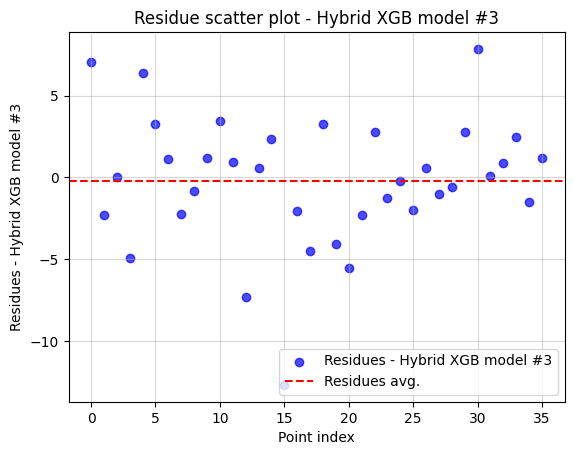

In [11]:
media_residuos = np.mean(residuos)

plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.7, label='Residues - Hybrid XGB model #3')
plt.axhline(y=media_residuos, color='red', linestyle='--', label='Residues avg.')
plt.xlabel('Point index')
plt.ylabel('Residues - Hybrid XGB model #3')
plt.title('Residue scatter plot - Hybrid XGB model #3')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.5)

plt.savefig('scatter_plot_XGB.png', dpi=300, bbox_inches='tight')

plt.show()

In [12]:
mean = np.mean(residuos)
std = np.std(residuos)

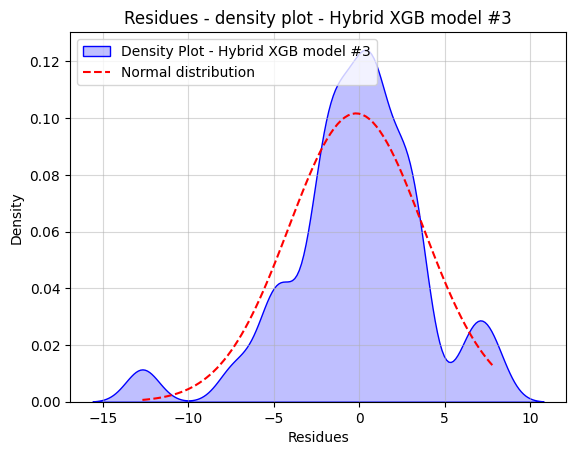

In [13]:
# Plotar a densidade dos resíduos
sns.kdeplot(residuos, fill=True, color='blue', label='Density Plot - Hybrid XGB model #3', bw_adjust=0.5)

# Criar os valores de x para a curva de distribuição normal
x_values = np.linspace(min(residuos), max(residuos), 100)

# Plotar a curva de distribuição normal usando a média e o desvio padrão dos resíduos
plt.plot(x_values, norm.pdf(x_values, mean, std), color='red', linestyle='dashed', label='Normal distribution')

# Configurações do gráfico
plt.title('Residues - density plot - Hybrid XGB model #3')
plt.xlabel('Residues')
plt.ylabel('Density')

# Exibir legenda e grade
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)

# Salvar o gráfico como imagem
plt.savefig('density_plot_XGB.png', dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [14]:
shapiro_test = stats.shapiro(residuos)
print("Estatística de teste:", shapiro_test[0])
print("Valor-p:", shapiro_test[1])

Estatística de teste: 0.9575288891792297
Valor-p: 0.18018727004528046


In [15]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_test_v2 = sm.add_constant(X_test)

# Realiza o teste de Breusch-Pagan/Cook-Weisberg
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X_test_v2)

# Imprime os resultados
print("Estatística LM:", lm)
print("Valor-p LM:", lm_p_value)
print("Estatística F:", fvalue)
print("Valor-p F:", f_p_value)

Estatística LM: 4.309424184267555
Valor-p LM: 0.36574648307577523
Estatística F: 1.053879160235816
Valor-p F: 0.39573302055762133


In [16]:
from scipy.stats import norm

# Calcula o teste de Durbin-Watson
durbin_watson_test = sm.stats.stattools.durbin_watson(residuos)

# Imprime o resultado
print("Estatística de Durbin-Watson:", durbin_watson_test)

nobs = len(residuos)
nvars = 4

# Calculando o valor crítico DW
d_critico = sm.stats.stattools.durbin_watson(residuos)

# Calculando DL, DU, 4-DL e 4-DU
DL = 1.521 - 1.25 * (nvars / nobs)
DU = 1.521 + 1.25 * (nvars / nobs)
quatro_DL = 4.0 - DL
quatro_DU = 4.0 - DU

# Imprimindo os resultados
print("DL:", DL)
print("DU:", DU)
print("4-DL:", quatro_DL)
print("4-DU:", quatro_DU)

Estatística de Durbin-Watson: 1.93623839946169
DL: 1.382111111111111
DU: 1.6598888888888887
4-DL: 2.617888888888889
4-DU: 2.3401111111111113


In [17]:
n = X_test.shape[0]
k = X_test.shape[1]

In [19]:
y_test_mean = np.mean(y_test)

# Calcular SSR (Sum of Squares Regression)
SSR = np.sum((teste_y_pred - y_test_mean) ** 2)

# Calcular SSE (Sum of Squares Error)
SSE = np.sum((y_test - teste_y_pred) ** 2)

# Calcular SST (Sum of Squares Total)
SST = np.sum((y_test - y_test_mean) ** 2)

# Calcular MSR (Mean Square Regression)
MSR = SSR / k

# Calcular MSE (Mean Square Error)
MSE = SSE / (n - k - 1)

# Calcular a estatística F
F_statistic = MSR / MSE

# Exibir os resultados
print(f'SSR (Sum of Squares Regression): {SSR}')
print(f'SSE (Sum of Squares Error): {SSE}')
print(f'MSR (Mean Square Regression): {MSR}')
print(f'MSE (Mean Square Error): {MSE}')
print(f'Estatística F: {F_statistic}')

SSR (Sum of Squares Regression): 1873.7630615234375
SSE (Sum of Squares Error): 555.7976629915169
MSR (Mean Square Regression): 468.4407653808594
MSE (Mean Square Error): 17.92895687069409
Estatística F: 26.1276084693222


In [20]:
from scipy.stats import f

df1 = k  
df2 = n - k - 1  

# Calcular o p-valor da estatística F
p_value = f.sf(F_statistic, df1, df2)

print(f'Prob (F-statistic): {p_value}')

Prob (F-statistic): 1.5238341068409354e-09


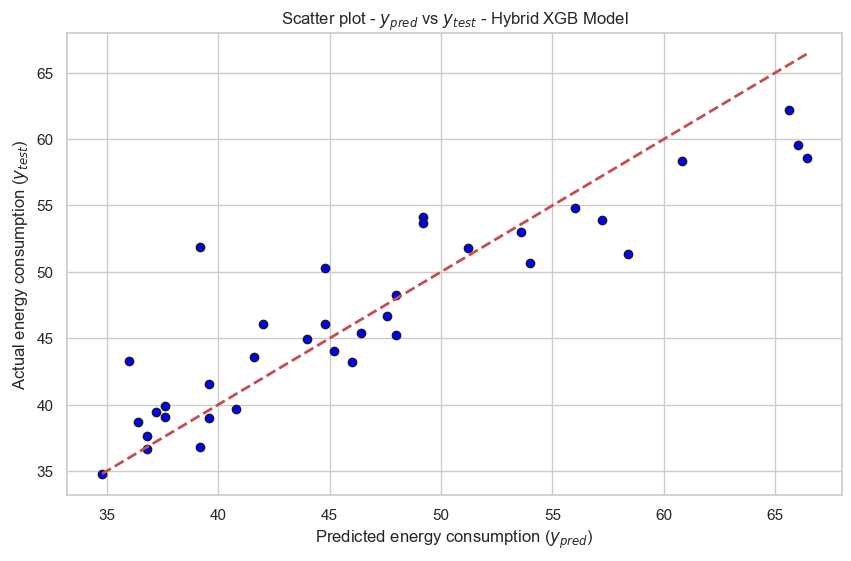

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
plt.scatter(y_test, teste_y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Predicted energy consumption ($y_{pred}$)')
plt.ylabel('Actual energy consumption ($y_{test}$)')
plt.title('Scatter plot - $y_{pred}$ vs $y_{test}$ - Hybrid XGB Model')

plt.savefig('pred_XGB.png', dpi=300, bbox_inches='tight')

plt.show()